In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [16]:
pip install basemap

Note: you may need to restart the kernel to use updated packages.


# The State of Global Air 2024 report highlights the alarming levels of air pollution worldwide, with significant impacts on human health. 

![Alt text](https://imgs.search.brave.com/YqFFEDB86k5TlW9y42UDS0zA_jIbPCYchYUCBeB8kdw/rs:fit:860:0:0:0/g:ce/aHR0cHM6Ly9pbWcu/ZnJlZXBpay5jb20v/ZnJlZS1waG90by9j/bGltYXRlLWNoYW5n/ZS13aXRoLWluZHVz/dHJpYWwtcG9sbHV0/aW9uXzIzLTIxNDky/MTc4MTYuanBnP3Nl/bXQ9YWlzX2h5YnJp/ZA)

99% of the world’s population breathes air that doesn’t meet World Health Organization (WHO) guidelines for what is safe to breathe.
According to [State of Global Air 2024] in 2021, air pollution was responsible for 8.1 million deaths globally, making it the second leading risk factor for death, after high blood pressure.
Moreover, climate change is impacting the health and wellbeing of city residents: from deaths caused by extreme heat, to flooding, to failing infrastructure, and more.

**In this notebook, I'm showing my skills in statistical data analysis across descriptive, exploratory, factor methods.**

Let's collect some data and see what the parameters are being monitored

In [17]:
import requests
import pandas as pd

In [18]:
url = "https://api.openaq.org/v3/parameters"
api_key = "d0b1e1ba00e38e157e1270f382667594076d5ebfaf8acc5934b366bcddfebca1"
headers = {
    "X-API-Key": api_key
}
# Make a GET request to fetch the parameters
response = requests.get(url, headers =headers )

if response.status_code == 200:
    # Parse the JSON response
    data = response.json()
    
    # Extract the 'results' key to create a DataFrame
    parameters_df = pd.DataFrame(data['results'])
    
    # Display the first few rows of the DataFrame
    print(parameters_df.head())
else:
    print(f"Failed to fetch parameters: {response.status_code}")

   id  name  units displayName  \
0   1  pm10  µg/m³        PM10   
1   2  pm25  µg/m³       PM2.5   
2   3    o3  µg/m³     O₃ mass   
3   4    co  µg/m³     CO mass   
4   5   no2  µg/m³    NO₂ mass   

                                         description  
0  Particulate matter less than 10 micrometers in...  
1  Particulate matter less than 2.5 micrometers i...  
2                           Ozone mass concentration  
3                 Carbon Monoxide mass concentration  
4                Nitrogen Dioxide mass concentration  


In [19]:
parameters_df.head(10)

,id,name,units,displayName,description
0,1,pm10,µg/m³,PM10,Particulate matter less than 10 micrometers in...
1,2,pm25,µg/m³,PM2.5,Particulate matter less than 2.5 micrometers i...
2,3,o3,µg/m³,O₃ mass,Ozone mass concentration
3,4,co,µg/m³,CO mass,Carbon Monoxide mass concentration
4,5,no2,µg/m³,NO₂ mass,Nitrogen Dioxide mass concentration
5,6,so2,µg/m³,SO₂ mass,Sulfur Dioxide mass concentration
6,7,no2,ppm,NO₂,Nitrogen Dioxide concentration
7,8,co,ppm,CO,Carbon Monoxide concentration
8,9,so2,ppm,SO₂,Sulfur Dioxide concentration
9,10,o3,ppm,O₃,Ozone concentration


The gaseous criteria air pollutants of primary concern in urban settings include sulfur dioxide (so2), nitrogen dioxide(no2), and carbon monoxide(co). 
These are emitted directly into the air from fossil fuels such as fuel oil, gasoline, and natural gas that are burned in power plants, automobiles, and other combustion sources. Below I outline the maximum acceptable concentration in the atmosphere on the air pollutant:

1. CO - 35 ppm (1-hour period); 9 ppm (8-hour period)
2. NO2 - 0.053 ppm (1-year period)
3. SO2 - 0.03 ppm (1-year period); 0.14 ppm (24-hour period)
4. O3 - 0.075 ppm (8-hour period)
5. pm10 /pm25 - 150 μg/m3 (24-hour period for particles <10 μm); 35 μg/m3 (24-hour period for particles <2.5 μm)

Measurement units μg/m3 : micro gram/cubic meter and ppm : Parts Per Million

In this project, I will use BigQuery to facilitate data retrieval and visualization. 
There are two primary reasons for choosing BigQuery: first, it's query syntax is the same as SQL, which makes it user-friendly for those familiar with SQL. Second, BigQuery is specifically optimized for querying large datasets, allowing me to access all the necessary data for my analysis while avoiding the rate limits commonly encountered with APIs.

Additionally, when collecting a large volume of measurement data over a period of time, using an API to request, I should download the data from each location, for me it's more complicated and time-consuming process.

In [99]:
from google.cloud import bigquery

client = bigquery.Client()

openaq = client.dataset("openaq", project="bigquery-public-data")
table_ref = openaq.table('global_air_quality')
table = client.get_table(table_ref)

# Preview the first five lines of the table
client.list_rows(table, max_results=5).to_dataframe()


Using Kaggle's public dataset BigQuery integration.


,location,city,country,pollutant,value,timestamp,unit,source_name,latitude,longitude,averaged_over_in_hours,location_geom
0,"Borówiec, ul. Drapałka",Borówiec,PL,bc,0.85217,2022-04-28 07:00:00+00:00,µg/m³,GIOS,1.0,52.276794,17.074114,POINT(52.276794 1)
1,"Kraków, ul. Bulwarowa",Kraków,PL,bc,0.91284,2022-04-27 23:00:00+00:00,µg/m³,GIOS,1.0,50.069308,20.053492,POINT(50.069308 1)
2,"Płock, ul. Reja",Płock,PL,bc,1.41000,2022-03-30 04:00:00+00:00,µg/m³,GIOS,1.0,52.550938,19.709791,POINT(52.550938 1)
3,"Elbląg, ul. Bażyńskiego",Elbląg,PL,bc,0.33607,2022-05-03 13:00:00+00:00,µg/m³,GIOS,1.0,54.167847,19.410942,POINT(54.167847 1)
4,"Piastów, ul. Pułaskiego",Piastów,PL,bc,0.51000,2022-05-11 05:00:00+00:00,µg/m³,GIOS,1.0,52.191728,20.837489,POINT(52.191728 1)


First of all, let's look at how the concentration of pollutants in the air has changed over the years.

In [124]:
avg_all_years = """
            SELECT EXTRACT(YEAR FROM timestamp) as `Year`,
                   AVG(value) as `Average`,
                   latitude,
                   longitude
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE unit = 'µg/m³'
        GROUP BY Year, 
                 latitude,
                 longitude
        """
avg_all_years_result =client.query(avg_all_years).result().to_dataframe()

avg_all_years_result.head(20)

,Year,Average,latitude,longitude
0,2015,790.0875,0.250000,28.678700
1,2015,213.7420,0.250000,28.560000
2,2015,213.7420,28.560000,77.094000
3,2015,790.0875,28.678700,77.226200
4,2008,26.4350,5.640814,-0.157906
5,2008,43.3200,5.581650,-0.198980
6,2007,75.5450,5.534919,-0.212406
7,2008,40.4300,44.000000,5.566722
8,2007,53.6700,45.000000,5.570722
9,2008,43.3200,23.000000,5.581650


In [126]:
avg_all_years_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17800 entries, 0 to 17799
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       17800 non-null  int64  
 1   Average    17800 non-null  float64
 2   latitude   17800 non-null  float64
 3   longitude  17799 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 556.4 KB


In [133]:
period = avg_all_years_result[(avg_all_years_result["Year"] > 2014) & (avg_all_years_result["Year"] < 2021) ] 
period['Average'] = period['Average'].replace(0, np.nan)
period.dropna(subset=['Average'], inplace=True)
period.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8636 entries, 0 to 8950
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       8636 non-null   int64  
 1   Average    8636 non-null   float64
 2   latitude   8636 non-null   float64
 3   longitude  8635 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 337.3 KB


In [134]:
print(period[['latitude', 'longitude']].describe())

          latitude    longitude
count  8636.000000  8635.000000
mean     29.994472     5.246278
std      22.286402    57.730154
min     -72.011700  -161.767000
25%       1.000000    -3.612660
50%      39.961830    12.032141
75%      47.266675    38.725205
max      78.906690   153.402000


In [135]:
period = period[period["latitude"]!= 1.0]
period.describe()

,Year,Average,latitude,longitude
count,6632.000000,6632.000000,6632.000000,6631.000000
mean,2019.397618,38.662935,38.755769,-5.019577
std,1.159597,1270.719159,17.774996,61.618832
min,2015.000000,-83873.727500,-72.011700,-161.767000
25%,2020.000000,8.400000,36.345163,-9.208889
50%,2020.000000,19.234729,43.319169,6.190435
75%,2020.000000,37.666667,48.529446,16.577129
max,2020.000000,50000.000000,78.906690,153.402000



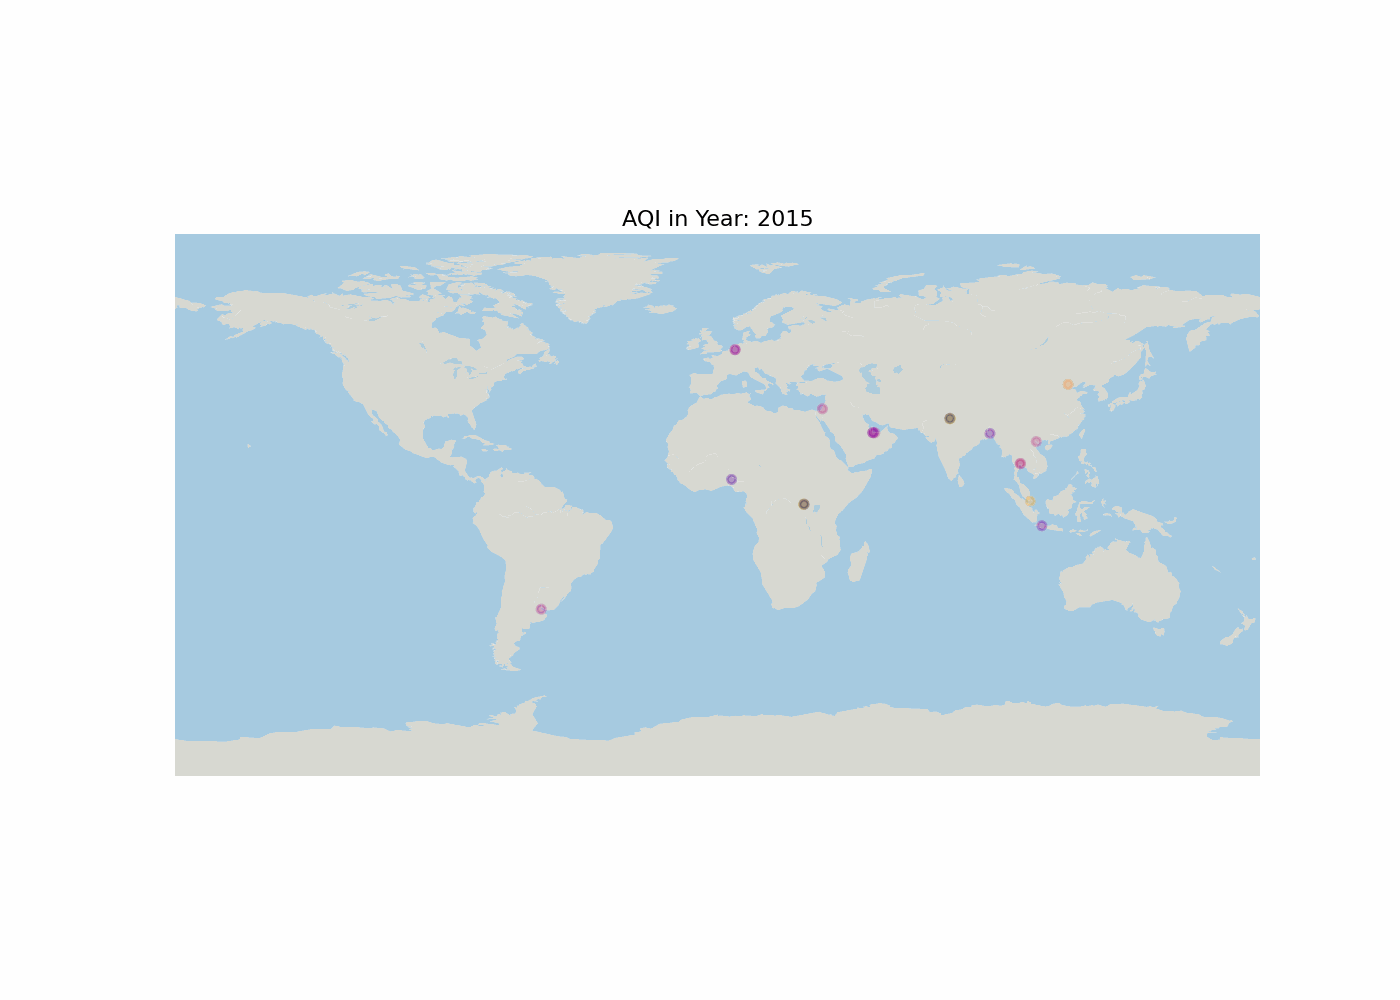

In [136]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib import animation,rc
import io
import base64
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')
fig, ax = plt.subplots(figsize=(14, 10))
plt.style.use('bmh')

def animate(Year):
    ax.clear()  # Clear the axis to prevent overlaps
    ax.set_title(f'AQI in Year: {int(Year)}', fontsize=16)
    ax.axis('off')  # Turn off the axis for a clean map
    
    m4 = Basemap(llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180,urcrnrlon=180,projection='cyl', ax=ax)
    m4.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
    m4.fillcontinents(color='#EEDFCC', alpha=0.7)
    m4.drawcoastlines(linewidth=0.1, color="white")
    m4.shadedrelief()
    
    lat_y = list(period[period['Year'] == Year]['latitude'])
    lon_y = list(period[period['Year'] == Year]['longitude'])
    lat,lon = m4(lat_y,lon_y) 
    avg = np.log(period[period['Year'] == Year]['Average'])
    m4.scatter(lon,lat,c = avg,lw=2, alpha=0.3,cmap='plasma')
   
ani = animation.FuncAnimation(fig,animate,list(period['Year'].unique()), interval = 1500)    
ani.save('animation.gif', writer='imagemagick', fps=1)
plt.close(fig)

filename = 'animation.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))



In [156]:
cnt_query = """
    SELECT country,COUNT(country) as `count`
    FROM `bigquery-public-data.openaq.global_air_quality`
    GROUP BY country
    HAVING COUNT(country) >100
    ORDER BY `count` DESC
    """
        
cnt =client.query(cnt_query).result().to_dataframe()

cnt.head()

,country,count
0,US,1421351
1,IN,770712
2,PL,341984
3,IT,280898
4,CA,266933


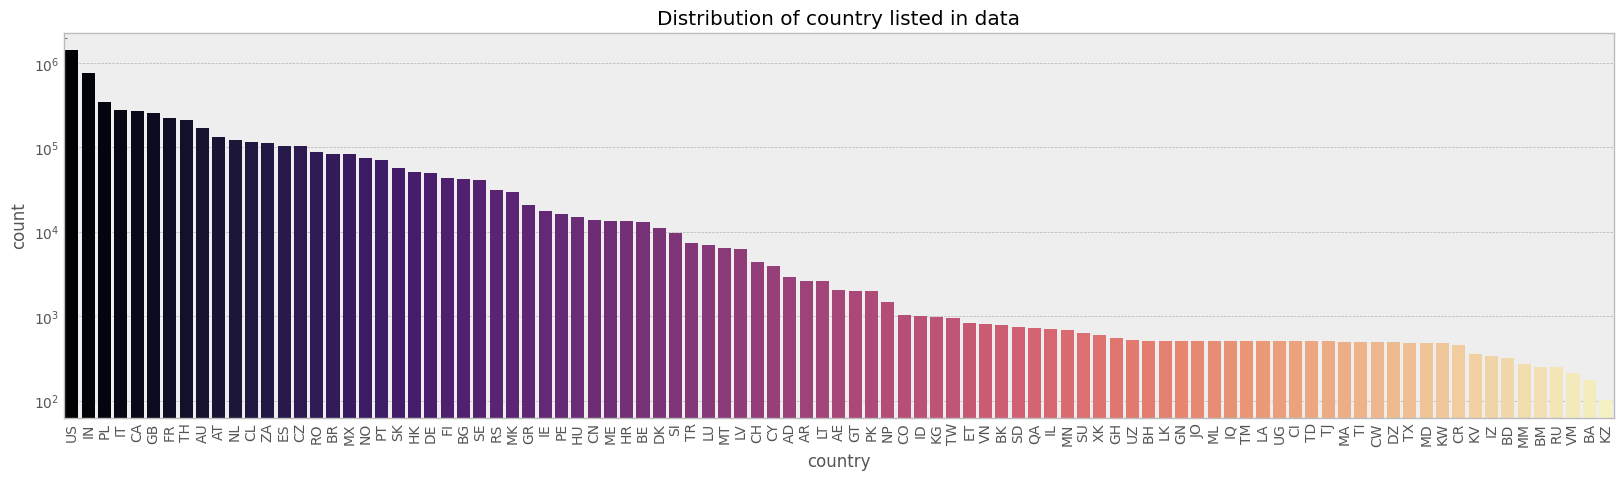

In [157]:
import seaborn as sns

plt.style.use('bmh')
plt.figure(figsize=(20,5))
sns.barplot(cnt, x= "country", y ="count", palette='magma')
plt.yscale('log')
plt.xticks(rotation=90)
plt.title('Distribution of country listed in data');

The pollution levels in various regions are concerning, with countries like the USA, India, European nations, and Southeast Asian countries leading the list. In contrast, countries such as Australia, those in Africa, and South Africa are not as prominent among the highest polluting nations.